In [1]:
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 18.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.3/913.3 kB 11.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 11.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.6 MB/s eta 0:00:0000:010:01m


In [4]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 5.8 MB/s eta 0:00:0000:0100:01


# Import données

In [13]:
import spacy
from spacy.lang.fr.examples import sentences 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pyarrow.parquet as pq
from pyarrow import csv, fs
from wordcloud import WordCloud
import io
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
pd.set_option('display.max_rows', 500)

In [7]:
s3 = fs.S3FileSystem(endpoint_override='https://'+'minio.lab.sspcloud.fr')
bucket = "projet-funathon"
path_data = "2023/sujet6/data"

In [8]:
with s3.open_input_file(f"{bucket}/{path_data}/Marcel Proust - A la recherche du temps perdu.txt") as file:
    texte = file.read().decode('utf-8')

In [9]:
with s3.open_input_file(f"{bucket}/{path_data}/ingredients.csv") as file:
    ingredients = csv.read_csv(file, parse_options=csv.ParseOptions(delimiter=";")).to_pandas()

In [10]:
len(texte)

7250634

In [11]:
ingredients.head()

,description
0,Abricot
1,Agar-agar
2,Agneau
3,Ail
4,Aïoli


In [16]:
nlp = spacy.load("fr_core_news_md")

In [17]:
nlp.max_length=8000000

In [18]:
doc=nlp(texte)

# Nuage de mots

In [24]:
# Nombre de mots

len(doc)

1488656

In [25]:
stopwords_fr = spacy.lang.fr.stop_words.STOP_WORDS

In [26]:
stopwords_custom = set()
for i, element in enumerate(stopwords_fr):
    nouvel_element = element.replace("'","’")
    stopwords_custom.add(nouvel_element)

In [27]:
type(stopwords_custom)

set

In [28]:
stopwords_custom.update(["qu’elle","qu’il","c’est","c’était","d’un","d’une","j’avais","qu’","l’","n’est"])

In [29]:
type(stopwords_custom)

set

In [30]:
# Filtre des mots de liaison

mots = texte.split()
mots_filtres = [mot for mot in mots if mot.lower() not in stopwords_custom]

# Rejoindre les mots filtrés en une seule chaîne de texte
texte_filtre = ' '.join(mots_filtres)

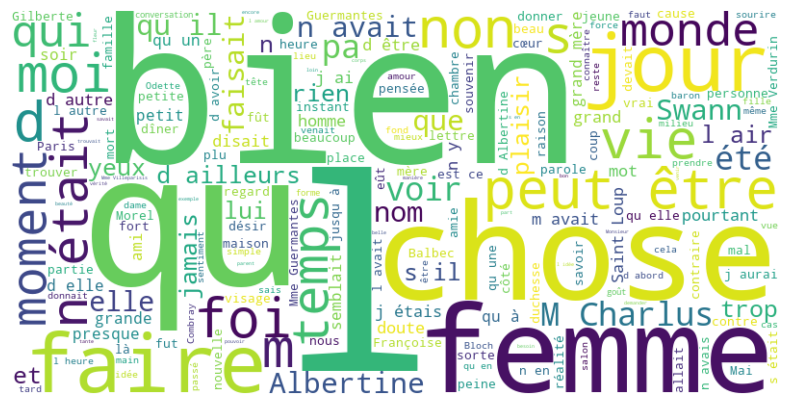

In [31]:
# Wordcloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_filtre)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Recherche d'entités nommées

In [32]:
print([(word.text,word.label_) for word in doc.ents][1:50])

[('PREMIÈRE PARTIE', 'MISC'), ('MONSIEUR GASTON', 'MISC'), ('CALMETTE\r\n\r\n\r\n\r\nComme un témoignage de profonde\r\n\r\net affectueuse reconnaissance', 'MISC'), ('Marcel Proust', 'PER'), ('François Ier', 'PER'), ('Charles-Quint', 'PER'), ('Ève', 'PER'), ('Adam', 'PER'), ('col rabattu', 'LOC'), ('Tiens', 'MISC'), ('Bohême', 'LOC'), ('Sienne', 'LOC'), ('Combray', 'LOC'), ('Mme de Saint-Loup', 'PER'), ('Mme de Saint-Loup', 'PER'), ('Combray', 'LOC'), ('Tansonville', 'LOC'), ('Mme de Saint-Loup', 'PER'), ('Débats roses', 'MISC'), ('Louis XVI', 'PER'), ('Combray', 'LOC'), ('Balbec', 'PER'), ('Paris', 'LOC'), ('Doncières', 'LOC'), ('Venise', 'LOC'), ('Combray', 'LOC'), ('coucher', 'LOC'), ('Golo', 'PER'), ('Geneviève de Brabant', 'PER'), ('Geneviève', 'PER'), ('Brabant', 'LOC'), ('Golo', 'PER'), ('cheval de Golo', 'MISC'), ('Golo', 'PER'), ('Golo', 'PER'), ('Golo', 'PER'), ('Barbe-Bleue', 'LOC'), ('Geneviève de Brabant', 'PER'), ('Golo', 'PER'), ('Françoise', 'PER'), ('Bathilde !', 'MISC

In [33]:
entites = [(word.text,word.label_) for word in doc.ents]
entites_diverses = [liste for liste in entites if liste[1] == 'MISC']

# Recherche des aliments

In [34]:
texte_aliment = [token.text for token in doc if token.text in ingredients]

In [35]:
liste_ingredients = ingredients["description"].tolist()
liste_ingredients = [element.lower() for element in liste_ingredients]

In [56]:
liste_ingredients=[element for element in liste_ingredients if element not in ["pieds","joue","rose","bleu","sang","oreilles","langue","épaule","cervelle","queue"]]

In [57]:
proust_aliments = [token.text for token in doc if token.text.lower() in liste_ingredients]

In [58]:
frequence_aliments = pd.DataFrame(proust_aliments, columns=['aliments']).value_counts()

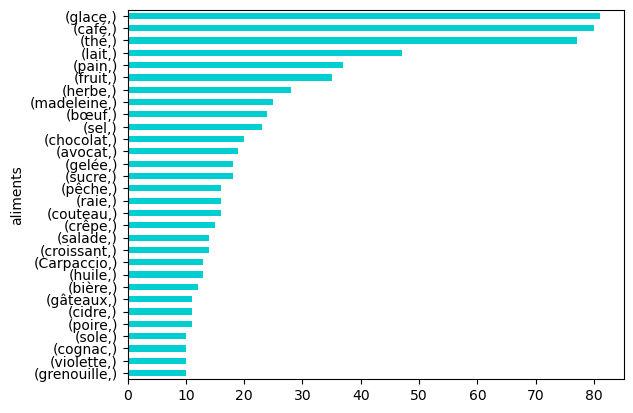

In [64]:
frequence_aliments[0:30].plot(kind="barh",
                            color="darkturquoise").invert_yaxis()

In [77]:
frequence_aliments = frequence_aliments.reset_index()

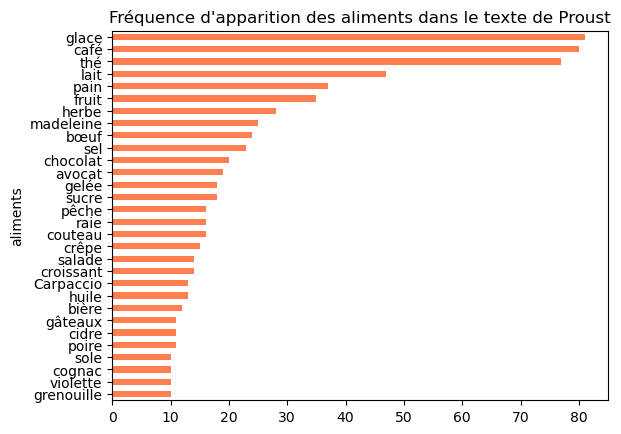

In [94]:
frequence_aliments[0:30].plot.barh(x="aliments", y="count",
                            color="coral",
                                  legend=False).invert_yaxis()

plt.title("Fréquence d'apparition des aliments dans le texte de Proust")
plt.show()